In [3]:
#importing libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt


df = pd.read_csv('C:/ML/python/data/Capsule Hotel Risk Classification Dataset (English Translated) - Sheet1.csv',delimiter=',')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          700 non-null    int64 
 1   content             700 non-null    object
 2   translated_content  700 non-null    object
 3   priority_score      700 non-null    int64 
 4   problem_domain      700 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 27.5+ KB


In [2]:
df.shape

(700, 5)

In [4]:
df.isna().sum()

Unnamed: 0            0
content               0
translated_content    0
priority_score        0
problem_domain        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.head(10)

,Unnamed: 0,content,translated_content,priority_score,problem_domain
0,1,"Sorry, including the expensive price + apk usi...","Sorry, including the expensive price + apk usi...",2,0
1,2,Setelah install terus pas buka aplikasi ngebla...,"After installed, the app stuck with white display",3,1
2,3,"gak bisa submit pada saat verifikasi data, pad...","Cannot submit the data verification, even my i...",3,1
3,4,Aplilasi restart mulu,The app keep restarting,3,1
4,5,"udah mahal , makanan ga enak, banyak lalat","Overpriced, bad food, too many flies",2,0
5,6,"fitur chat dengan host tidak bisa digunakan, p...","The chat feature which is important, can't be ...",2,1
6,7,Mahal mahal.. kirain LBH murah dari refdorz da...,"Overpriced, at first I think it's cheaper than...",2,0
7,8,duh ini berisik amat yg diatas. Pake peredam d...,It's very noisy up there. Please add the sound...,2,0
8,9,"ribet pemesanan nya, pelayanan nya juga kurang...",It's not seamless anyway. The service is bad,2,1
9,10,APA APAAN HARUS UPDATE APP,"COME ON, I HAVE TO UPDATE THE APP FREQUENTLY",2,1


In [7]:
#lower-casing and other stuff


df.drop(['Unnamed: 0','content'],axis=1,inplace=True)
df["translated_content"] = df["translated_content"].str.lower()
df["translated_content"] = df["translated_content"].str.replace("\d", "")
df["translated_content"] = df["translated_content"].str.replace("[^\w\s]", "")



df['translated_content'] = df['translated_content'].replace('loading','')
df['translated_content'] = df['translated_content'].replace('[','')
df['translated_content'] = df['translated_content'].replace(']','')



In [8]:
#stopword removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sw = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in sw]
    return ' '.join(filtered_tokens)

df['translated_content'] = df['translated_content'].apply(remove_stopwords)
print(df['translated_content'])

0      sorry including expensive price apk using engl...
1                      installed app stuck white display
2      submit data verification even internet stable ...
3                                    app keep restarting
4                         overpriced bad food many flies
                             ...                        
695    please clean mens bathrooms specifically men c...
696                                                     
697    would nice people could leave luggage checkout...
698           mattress turned really hard apart far good
699                                                     
Name: translated_content, Length: 700, dtype: object


In [9]:
#removing HTML tags

import re

def remove_html_tags(text):
    pattern = r'<.*?>' 
    text = re.sub(pattern, '', text)
    return text

df['translated_content'] = df['translated_content'].apply(remove_html_tags)
print(df['translated_content'])

0      sorry including expensive price apk using engl...
1                      installed app stuck white display
2      submit data verification even internet stable ...
3                                    app keep restarting
4                         overpriced bad food many flies
                             ...                        
695    please clean mens bathrooms specifically men c...
696                                                     
697    would nice people could leave luggage checkout...
698           mattress turned really hard apart far good
699                                                     
Name: translated_content, Length: 700, dtype: object


In [10]:
from textblob import Word
from textblob import TextBlob
from wordcloud import WordCloud
nltk.download("omw-1.4")
nltk.download("wordnet")


word = " ".join(i for i in df.translated_content)
print(word)


sorry including expensive price apk using english people dont understand difficult book installed app stuck white display submit data verification even internet stable enough app keep restarting overpriced bad food many flies chat feature important cant used overpriced first think cheaper refdorz oyo noisy please add sound reducer seamless anyway service bad come update app frequently hassle responsibility app errors causing checkin date changed bad service made holiday bad mood nowadays price doesnt make sense cheapest price k single bed think worth stay regular hotel service poor baby facilities room different even price stayed bobobox bekasi receptionist woman polite handle guests please add training fix service thank receiptionist woman rude bekasi branch suddenly logout login im sorry first time stayed bobobox kota tua im dissapointed services hard registration process price somehow expensive facility service goes bad first impression host rude facility consist seamless recommenda

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
#polarity through textblob
text_ = TextBlob(word)

print(text_.polarity)

0.04825366794921265


In [12]:
#pos tagging through Textblog
print(text_.pos_tags)

[('sorry', 'NN'), ('including', 'VBG'), ('expensive', 'JJ'), ('price', 'NN'), ('apk', 'NN'), ('using', 'VBG'), ('english', 'JJ'), ('people', 'NNS'), ('dont', 'VBP'), ('understand', 'JJ'), ('difficult', 'JJ'), ('book', 'NN'), ('installed', 'VBD'), ('app', 'JJ'), ('stuck', 'JJ'), ('white', 'JJ'), ('display', 'NN'), ('submit', 'NN'), ('data', 'NNS'), ('verification', 'NN'), ('even', 'RB'), ('internet', 'RBR'), ('stable', 'JJ'), ('enough', 'RB'), ('app', 'JJ'), ('keep', 'VB'), ('restarting', 'NN'), ('overpriced', 'JJ'), ('bad', 'JJ'), ('food', 'NN'), ('many', 'JJ'), ('flies', 'NNS'), ('chat', 'VBP'), ('feature', 'NN'), ('important', 'JJ'), ('cant', 'NN'), ('used', 'VBN'), ('overpriced', 'VBD'), ('first', 'JJ'), ('think', 'VB'), ('cheaper', 'JJR'), ('refdorz', 'NN'), ('oyo', 'IN'), ('noisy', 'JJ'), ('please', 'NN'), ('add', 'VB'), ('sound', 'JJ'), ('reducer', 'NN'), ('seamless', 'NN'), ('anyway', 'RB'), ('service', 'NN'), ('bad', 'JJ'), ('come', 'JJ'), ('update', 'NN'), ('app', 'NNS'), ('fr

In [13]:
#sentiment of text
print(text_.sentiment)

Sentiment(polarity=0.04825366794921265, subjectivity=0.5110110868229679)


In [14]:
#word counts
print(text_.word_counts)

defaultdict(<class 'int'>, {'sorry': 6, 'including': 2, 'expensive': 8, 'price': 15, 'apk': 6, 'using': 8, 'english': 3, 'people': 27, 'dont': 22, 'understand': 2, 'difficult': 15, 'book': 10, 'installed': 1, 'app': 21, 'stuck': 3, 'white': 3, 'display': 1, 'submit': 2, 'data': 4, 'verification': 6, 'even': 58, 'internet': 4, 'stable': 1, 'enough': 11, 'keep': 7, 'restarting': 1, 'overpriced': 2, 'bad': 23, 'food': 10, 'many': 14, 'flies': 4, 'chat': 2, 'feature': 5, 'important': 6, 'cant': 55, 'used': 11, 'first': 23, 'think': 7, 'cheaper': 2, 'refdorz': 1, 'oyo': 2, 'noisy': 13, 'please': 40, 'add': 7, 'sound': 9, 'reducer': 1, 'seamless': 3, 'anyway': 1, 'service': 46, 'come': 15, 'update': 10, 'frequently': 1, 'hassle': 2, 'responsibility': 1, 'errors': 1, 'causing': 1, 'checkin': 9, 'date': 7, 'changed': 6, 'made': 7, 'holiday': 2, 'mood': 2, 'nowadays': 1, 'doesnt': 22, 'make': 16, 'sense': 1, 'cheapest': 1, 'k': 2, 'single': 5, 'bed': 11, 'worth': 5, 'stay': 11, 'regular': 3, 'h

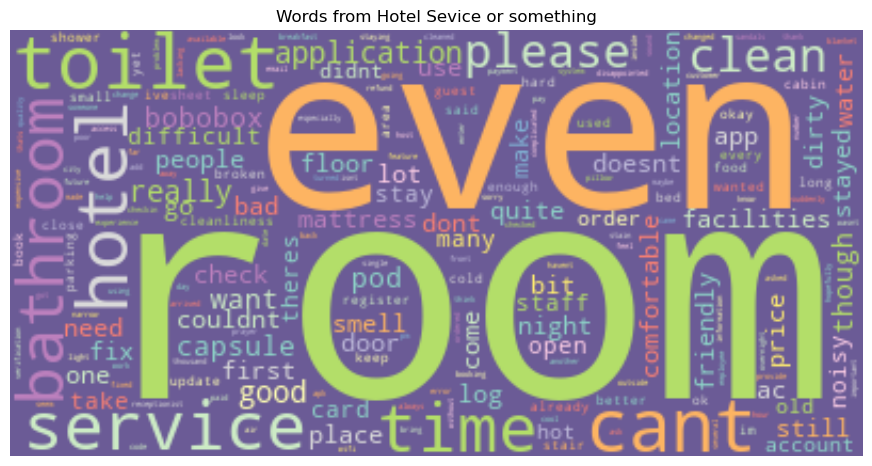

In [16]:
#most common word was room
wordcloud = WordCloud(
    background_color="#6B5B96",
    colormap="Set3",
    collocations=False).generate(word)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Words from Hotel Sevice or something")
plt.show()


In [17]:
#evaluating text processing through CountVectorize

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
from sklearn.model_selection import train_test_split
X = df["translated_content"]
X = cv.fit_transform(X).toarray()
y = df['problem_domain']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)




from sklearn.linear_model import PassiveAggressiveClassifier
PA = PassiveAggressiveClassifier()

from sklearn.ensemble import GradientBoostingClassifier,BaggingClassifier
GBC = GradientBoostingClassifier()
BC = BaggingClassifier()


from sklearn.svm import SVC

svc = SVC(probability=True)

from sklearn.metrics import accuracy_score,classification_report


def evaluate_model(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test,pred)
    print(f'{model.__class__.__name__}, --ACC-- {acc*100:.2f}%; --Class Report-- {clf_rpt}%')
    return pred


PA_pred = evaluate_model(X_train, X_test, y_train, y_test, PA)
GBC_pred = evaluate_model(X_train, X_test, y_train, y_test, GBC)
svc_pred = evaluate_model(X_train, X_test, y_train, y_test, svc)
BC_pred = evaluate_model(X_train, X_test, y_train, y_test, BC)

PassiveAggressiveClassifier, --ACC-- 87.86%; --Class Report--               precision    recall  f1-score   support

           0       0.90      0.96      0.93       112
           1       0.76      0.57      0.65        28

    accuracy                           0.88       140
   macro avg       0.83      0.76      0.79       140
weighted avg       0.87      0.88      0.87       140
%
GradientBoostingClassifier, --ACC-- 84.29%; --Class Report--               precision    recall  f1-score   support

           0       0.85      0.98      0.91       112
           1       0.80      0.29      0.42        28

    accuracy                           0.84       140
   macro avg       0.82      0.63      0.67       140
weighted avg       0.84      0.84      0.81       140
%
SVC, --ACC-- 83.57%; --Class Report--               precision    recall  f1-score   support

           0       0.83      1.00      0.91       112
           1       1.00      0.18      0.30        28

    accuracy       